# Surface measurements

In this notebook we demonstrate how to retrieve surface/vertex measurements in a table and how to visualize them on the surface. The used example data is a derived from of [AV Luque and JV Veenvliet (2023)](https://zenodo.org/record/7603081#.Y94N4XbMJmN) licensed [CC-BY](https://creativecommons.org/licenses/by/4.0/legalcode). See the [creating_surfaces](creating_surfaces.ipynb) for how to create the surface from raw imaging data.

See also
* [vedo library](https://vedo.embl.es/)
* [vedo add curvature documentation](https://vedo.embl.es/autodocs/content/vedo/mesh.html?highlight=curvature#vedo.mesh.Mesh.addCurvatureScalars)

In [1]:
import napari
import matplotlib.pyplot as plt
from napari.utils import nbscreenshot
import numpy as np
import vedo
from napari_process_points_and_surfaces import add_curvature, Curvature, spherefitted_curvature
import napari_process_points_and_surfaces as nppas

import vedo

In [2]:
viewer = napari.Viewer(ndisplay=3)
viewer.camera.angles = (40, -30, 55)

In [3]:
surface = nppas.gastruloid()

The nppas gastruloid example is derived from AV Luque and JV Veenvliet (2023) which is licensed CC-BY (https://creativecommons.org/licenses/by/4.0/legalcode) and can be downloaded from here: https://zenodo.org/record/7603081


## Surface visualization
The surface itself does not come with any quantification. It looks like this:

(array([[ 13.350468, 224.74281 , 225.16551 ],
        [ 13.402716, 215.6347  , 221.71007 ],
        [ 13.405661, 219.80322 , 230.87416 ],
        ...,
        [112.37943 , 357.7101  , 433.3927  ],
        [112.291046, 363.939   , 421.2268  ],
        [113.00919 , 357.6267  , 422.36804 ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    4,    7],
        ...,
        [3318, 3317, 3316],
        [3316, 3323, 3318],
        [3318, 3323, 3319]], dtype=int64))
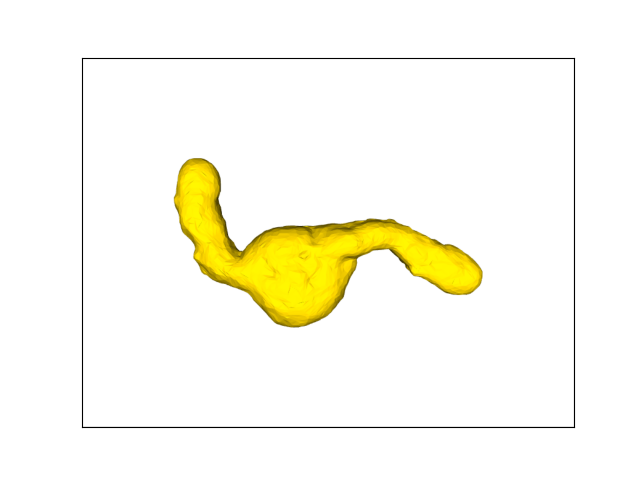

In [4]:
surface

## Quantification
We can create a table ([pandas Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)) like this.

In [5]:
requested_measurements = [nppas.Quality.AREA, 
                          nppas.Quality.ASPECT_RATIO,
                          nppas.Quality.GAUSS_CURVATURE, 
                          nppas.Quality.MEAN_CURVATURE,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_DECA_VOXEL,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_KILO_VOXEL,
                         ]

df = nppas.surface_quality_table(surface, requested_measurements)
df

c:\structure\code\vedo\vedo\pointcloud.py:526: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  C, residue, rank, _ = np.linalg.lstsq(A, f)  # solve AC=f


,vertex_index,Quality.AREA,Quality.ASPECT_RATIO,Quality.GAUSS_CURVATURE,Quality.MEAN_CURVATURE,Quality.SPHERE_FITTED_CURVATURE_DECA_VOXEL,Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL,Quality.SPHERE_FITTED_CURVATURE_KILO_VOXEL
0,0,26.051905,1.644442,0.080625,0.003132,0.002357,0.000259,0.000019
1,1,59.538836,2.183670,0.012399,-0.000029,NaN,0.000255,0.000019
2,2,34.474342,1.312237,0.046792,0.001864,0.001524,0.000254,0.000019
3,3,44.042938,1.689446,0.001544,-0.000043,NaN,0.000376,0.000019
4,4,60.561253,1.554006,0.020993,0.000320,NaN,0.000396,0.000019
...,...,...,...,...,...,...,...,...
3319,3319,40.486772,1.427050,0.043288,0.001205,0.002622,0.000166,0.000019
3320,3320,47.904823,1.882670,0.007678,0.000028,NaN,0.000172,0.000019
3321,3321,46.638693,1.462146,0.011874,0.000031,NaN,0.000164,0.000019
3322,3322,51.174051,1.740423,0.017611,0.000224,0.000268,0.000155,0.000019


To get an overview about measurements, we can summarize them:

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vertex_index,3324.0,1661.500000,959.700474,0.000000e+00,830.750000,1661.500000,2492.250000,3323.000000
Quality.AREA,3324.0,34.819352,9.674659,1.617410e+01,28.865331,33.080149,38.475447,147.644106
Quality.ASPECT_RATIO,3324.0,1.957088,0.590047,1.133678e+00,1.571132,1.820567,2.183698,9.777689
Quality.GAUSS_CURVATURE,3324.0,0.014562,0.031916,-4.008856e-01,0.000411,0.013980,0.027783,0.501089
Quality.MEAN_CURVATURE,3324.0,0.000232,0.007539,-7.143830e-03,-0.000319,-0.000012,0.000396,0.428012
Quality.SPHERE_FITTED_CURVATURE_DECA_VOXEL,2776.0,0.003230,0.004873,7.518662e-10,0.000360,0.001211,0.003587,0.033783
Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL,3324.0,0.000258,0.000068,1.488494e-04,0.000214,0.000241,0.000275,0.000542
Quality.SPHERE_FITTED_CURVATURE_KILO_VOXEL,3324.0,0.000019,0.000000,1.865845e-05,0.000019,0.000019,0.000019,0.000019


We can extract a single column for the table as list.

In [7]:
curvature = list(df['Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL'])
curvature[:5]

[0.00025909078999191055,
 0.00025452511169107503,
 0.0002543014406570107,
 0.0003761004291542413,
 0.00039564108093952387]

## Visualizing measurements
To visualize the measurements, we need to attach them to the surface:

(array([[ 13.350468, 224.74281 , 225.16551 ],
        [ 13.402716, 215.6347  , 221.71007 ],
        [ 13.405661, 219.80322 , 230.87416 ],
        ...,
        [112.37943 , 357.7101  , 433.3927  ],
        [112.291046, 363.939   , 421.2268  ],
        [113.00919 , 357.6267  , 422.36804 ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    4,    7],
        ...,
        [3318, 3317, 3316],
        [3316, 3323, 3318],
        [3318, 3323, 3319]], dtype=int64),
 [0.00025909078999191055,
  0.00025452511169107503,
  0.0002543014406570107,
  0.0003761004291542413,
  0.00039564108093952387,
  0.00034606878628403695,
  0.00035908889149895146,
  0.0003950816851903963,
  0.00028505976824242567,
  0.00029198994521346255,
  0.0002568723956414159,
  0.0002543702480449575,
  0.0002481654674772585,
  0.0002571795526469221,
  0.00025539273818664523,
  0.0004286741326642654,
  0.0004041054654877081,
  0.00041816410036914984,
  0.0004002870406841056,
  0.00035515250211677477,
  0.00036661016924333437,
  0.0003382160901155134,
  0.0003181763593412206,
  0.00030242341984878276,
  0.00029581249819960896,
  0.00026569797187252285,
  0.00027895147936432335,
  0.0002569678357626908,
  0.00025802721955302976,
  0.00024832337277241943,
  0.00026034470981567165,
  0.0002638784338332149,
  0.0002493583280267637,
  0.00019319420673256666,
  0.0001978954401332105,
  0.00021070745852123707,
  0.0001836363629774056,
  0.00020466046504413724,
  0.00016915709635481686,
  0.00016830015882637653,
  0.00017137469521686342,
  0.0001735936116086579,
  0.00017879947620830526,
  0.00017005035210692062,
  0.0001733667477080871,
  0.0001884539389751252,
  0.00018771889312945691,
  0.000197345630561757,
  0.0002030312986385733,
  0.00019670214427210795,
  0.00043118820325255784,
  0.0003846956089343054,
  0.00029785533641366025,
  0.00034250956058553774,
  0.00030995992616409345,
  0.0003207777367083095,
  0.0003050657212385448,
  0.0002720703558266366,
  0.0002849669219475546,
  0.00026769322015917046,
  0.0002447187642824016,
  0.00026138418175575935,
  0.0002597205007691226,
  0.0002541221315257073,
  0.0002557077414087285,
  0.000206620600628727,
  0.00022178574426747087,
  0.00020093626003958343,
  0.00021418730383550104,
  0.00018643410564573687,
  0.0002084673992516179,
  0.0001841946596979666,
  0.00017504832386851634,
  0.00017313326768298362,
  0.00018672365845005977,
  0.00017702385733739544,
  0.0001781163267807862,
  0.00017517754331606628,
  0.0001697435533089941,
  0.0001839940016332183,
  0.0001785283488602869,
  0.00016944444757635238,
  0.00017293381068741122,
  0.00017505750400375605,
  0.00018489925286340264,
  0.00016904205582543753,
  0.00017040338190848673,
  0.00017429071640714402,
  0.0001694302710687234,
  0.00017121188415960382,
  0.00018037112479710727,
  0.0001885660166675181,
  0.00019373208995507907,
  0.00018585691358767483,
  0.00017881606448064033,
  0.00018597864154203767,
  0.00019007547714853287,
  0.00019999566620516692,
  0.00019946233355963843,
  0.00021131744875550347,
  0.00021176195369969325,
  0.0002093152820419718,
  0.000444163681842931,
  0.000409592303005859,
  0.00040149432145045443,
  0.0004171744663166416,
  0.0003586928214206776,
  0.0003363755904824136,
  0.00031624621335605093,
  0.000295864183463075,
  0.0002829062363048636,
  0.000302890535565507,
  0.0002535924816614532,
  0.00026112792663122113,
  0.0002626559766617105,
  0.0002691801687480009,
  0.0002488882815778271,
  0.0002566675568359685,
  0.000266047817324,
  0.00026333867558603455,
  0.00025194446727833895,
  0.000250225730030345,
  0.0002591003493695868,
  0.0002530918344265681,
  0.0002225651282400618,
  0.00022525217448593406,
  0.00022211138830675772,
  0.00019916154847261045,
  0.00018997797094491139,
  0.00020283829275970428,
  0.000189896885802458,
  0.00018300398548952562,
  0.0001905873146480356,
  0.00018465946979264627,
  0.00017259061361975941,
  0.0001764393048434056,
  0.0001728271423512558,
  0.0001684
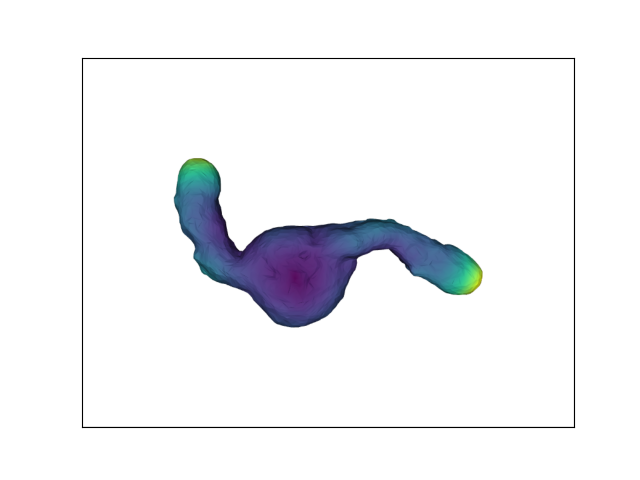
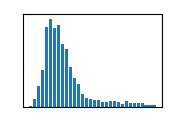

In [8]:
quantified_surface = nppas.set_vertex_values(surface, curvature)
quantified_surface

The visualization can be customized as well, e.g. by changing the view angle and the colormap.

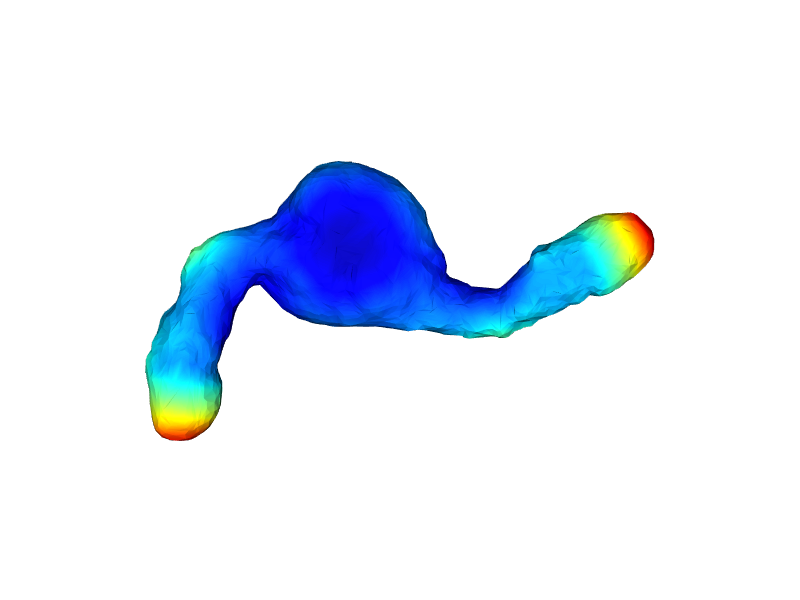

In [9]:
nppas.show(quantified_surface, azimuth=-90, cmap='jet')

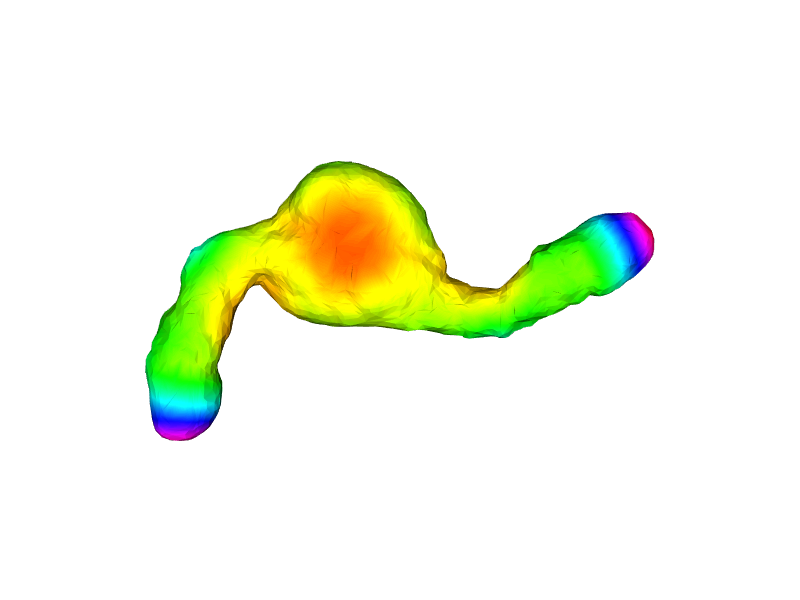

In [10]:
nppas.show(quantified_surface, azimuth=-90, cmap='hsv')